In [949]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [950]:
import warnings
warnings.filterwarnings('ignore')

In [951]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [952]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [953]:
train_C2H6

,G_A_C2H6,Re_A**2,Cx_A_C2H6,Cx_A_C2H6**2,Pe_ef_C2H6,Pe_ef_C2H6**2,G_B_C2H6
0,3.507886,1.653981e+11,-0.489581,0.239689,-0.190170,0.036165,3.261401
1,3.458369,1.635411e+11,-0.246485,0.060755,-0.143749,0.020664,3.287555
2,3.520068,1.646872e+11,-0.170814,0.029178,0.593639,0.352407,3.286083
3,3.589369,1.663679e+11,-0.233986,0.054749,4.228007,17.876047,3.287569
4,3.594282,1.667160e+11,-0.301800,0.091083,-0.320362,0.102632,3.287977
...,...,...,...,...,...,...,...
5793,3.572406,1.713827e+11,0.034875,0.001216,-1.283931,1.648479,3.613900
5794,3.565468,1.715185e+11,0.041494,0.001722,0.105731,0.011179,3.619171
5795,3.567413,1.719233e+11,0.053704,0.002884,0.047468,0.002253,3.627698
5796,3.570442,1.723279e+11,0.060286,0.003634,0.051004,0.002601,3.638930


In [954]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [955]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [956]:
train_C3H8

,B_rate,G_A_C3H8,Re_A**2,w_prev,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_C3H8
0,71.591090,28.822011,1.653981e+11,0.282218,5.028694,0.032902,0.707197,27.603653
1,71.707246,28.179261,1.635411e+11,0.281087,1.484397,0.004709,0.231491,27.783881
2,71.811607,28.198436,1.646872e+11,0.280494,0.156325,0.007586,0.097052,27.734744
3,71.904943,28.473852,1.663679e+11,0.280643,0.215011,0.013121,0.121494,27.679363
4,71.996468,28.625395,1.667160e+11,0.280985,0.631212,0.020599,0.204350,27.624403
...,...,...,...,...,...,...,...,...
5793,72.121189,25.245525,1.713827e+11,0.274930,0.341780,0.016146,0.250456,25.788062
5794,72.237662,25.309821,1.715185e+11,0.275224,0.294347,0.015368,0.268782,25.830453
5795,72.362225,25.362570,1.719233e+11,0.275694,0.271058,0.013704,0.294229,25.881397
5796,72.481486,25.424037,1.723279e+11,0.276149,0.269181,0.011038,0.327344,25.950659


In [957]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [958]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [959]:
train_iC4H10

,B_rate,G_A_C3H8,G_A_iC4H10,Re_A**2,w_prev,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_iC4H10
0,71.591090,28.822011,12.256473,1.653981e+11,0.282218,0.032902,0.707197,12.325097
1,71.707246,28.179261,12.278466,1.635411e+11,0.281087,0.004709,0.231491,12.365565
2,71.811607,28.198436,12.246353,1.646872e+11,0.280494,0.007586,0.097052,12.360900
3,71.904943,28.473852,12.208397,1.663679e+11,0.280643,0.013121,0.121494,12.351922
4,71.996468,28.625395,12.207304,1.667160e+11,0.280985,0.020599,0.204350,12.340423
...,...,...,...,...,...,...,...,...
5793,72.121189,25.245525,11.661197,1.713827e+11,0.274930,0.016146,0.250456,11.537228
5794,72.237662,25.309821,11.678729,1.715185e+11,0.275224,0.015368,0.268782,11.561665
5795,72.362225,25.362570,11.692550,1.719233e+11,0.275694,0.013704,0.294229,11.587488
5796,72.481486,25.424037,11.707783,1.723279e+11,0.276149,0.011038,0.327344,11.616500


In [960]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [961]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [962]:
train_nC4H10

,B_rate,G_A_C3H8,G_A_nC4H10,Re_A**2,w_prev,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_nC4H10
0,71.591090,28.822011,16.885985,1.653981e+11,0.282218,0.032902,0.707197,17.367120
1,71.707246,28.179261,17.072465,1.635411e+11,0.281087,0.004709,0.231491,17.383997
2,71.811607,28.198436,17.025021,1.646872e+11,0.280494,0.007586,0.097052,17.373582
3,71.904943,28.473852,16.906464,1.663679e+11,0.280643,0.013121,0.121494,17.358515
4,71.996468,28.625395,16.856159,1.667160e+11,0.280985,0.020599,0.204350,17.339268
...,...,...,...,...,...,...,...,...
5793,72.121189,25.245525,17.125750,1.713827e+11,0.274930,0.016146,0.250456,17.644192
5794,72.237662,25.309821,17.142614,1.715185e+11,0.275224,0.015368,0.268782,17.685043
5795,72.362225,25.362570,17.154685,1.719233e+11,0.275694,0.013704,0.294229,17.726825
5796,72.481486,25.424037,17.166859,1.723279e+11,0.276149,0.011038,0.327344,17.763570


In [963]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [964]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [965]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [966]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [967]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [968]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [969]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [970]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [701]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [702]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.08775489960332757

In [703]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.01156378119599739, max:0.013674762227987265, min:0.009829539183829525, std:0.0013775858177844918


In [704]:
lr_scoring

array([0.00982954, 0.01158053, 0.01235375, 0.01367476, 0.01038033])

In [705]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.016871258485017138, max:0.037181943362087175, min:0.008769901491807222, std:0.010402308960329627


In [706]:
lr_scoring

array([0.03718194, 0.01333157, 0.0087699 , 0.01506365, 0.01000923])

### C3H8

In [707]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [708]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.8993677473338493

In [709]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:2.37751236079186, max:8.484730887022248, min:0.33088259894526995, std:3.0683710573445127


In [710]:
lr_scoring

array([0.82039002, 8.48473089, 1.24700449, 0.3308826 , 1.0045538 ])

In [711]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:2.6065375559215473, max:6.9950844947689514, min:0.41764537575673893, std:2.554109196878999


In [712]:
lr_scoring

array([6.99508449, 4.026361  , 0.41764538, 0.77997773, 0.81361917])

### iC4H10

In [713]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [714]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9339970802797151

In [715]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.7606821939118522, max:2.798719819474011, min:0.16200464637130457, std:1.0223712440421586


In [716]:
lr_scoring

array([0.16200465, 2.79871982, 0.25858788, 0.18511387, 0.39898475])

In [717]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.995646344865964, max:17.99235816575413, min:0.18769032391030552, std:7.005456188706679


In [718]:
lr_scoring

array([17.99235817,  1.09042261,  0.18769032,  0.28920191,  0.41855872])

### nC4H10

In [719]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [720]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2157214452580305

In [721]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.6186087915075353, max:1.8210146871000314, min:0.17189825239374826, std:0.6061362248823811


In [722]:
lr_scoring

array([0.37430742, 1.82101469, 0.3381095 , 0.17189825, 0.3877141 ])

In [723]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.509541393747997, max:14.310100390106118, min:0.22325933245459226, std:5.447086761524571


In [724]:
lr_scoring

array([14.31010039,  2.18251738,  0.41740325,  0.22325933,  0.41442662])

# lasso_regressor

### C2H6

In [725]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [726]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

In [727]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.7391010338473573, max:1.3573229747620663, min:0.3225992593174646, std:0.39932915595501645


In [728]:
ls_scoring

array([1.35732297, 1.06027936, 0.5074833 , 0.44782027, 0.32259926])

In [729]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [730]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [731]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [732]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 390 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [733]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [734]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6764697674100997
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [735]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.024539097237825

In [736]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [737]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 359 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [738]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [739]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6268706661589943
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [740]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.024539097237825

### C3H8

In [741]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [742]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6651071559158253

In [743]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:2.8340178193781633, max:10.194233284580378, min:0.32335360285457354, std:3.700276798721592


In [744]:
ls_scoring

array([ 1.1708592 , 10.19423328,  1.50670667,  0.3233536 ,  0.97493633])

In [745]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.5860826234000895, max:7.7018155776801835, min:0.4550719728421791, std:2.7644163639349864


In [746]:
ls_scoring

array([7.70181558, 3.32724639, 0.45507197, 0.66140679, 0.78487239])

In [747]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [748]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [749]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [750]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 371 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [751]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [752]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.07907689042474
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [753]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7057637542909934

In [754]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [755]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 418 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [756]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [757]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.561978289585348
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [758]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7057637542909934

### iC4H10

In [759]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [760]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9333868510046126

In [761]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.2810734123288268, max:4.572704732033658, min:0.3129721481235549, std:1.6487256615879988


In [762]:
ls_scoring

array([0.57105206, 4.57270473, 0.55674856, 0.31297215, 0.39188956])

In [763]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.1923616441454514, max:2.868031934677872, min:0.23358410938260601, std:1.0946089539395805


In [764]:
ls_scoring

array([2.86803193, 2.13226102, 0.30140522, 0.23358411, 0.42652594])

In [765]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [766]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [767]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [768]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 371 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [769]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [770]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1646224208828384
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [771]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

In [772]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [773]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 393 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [774]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [775]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0863995200564565
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [776]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

### nC4H10

In [777]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [778]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3133927241337713

In [779]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.5798065016917802, max:6.395014553392381, min:0.2913427543876324, std:2.408030512879343


In [780]:
ls_scoring

array([0.42342055, 6.39501455, 0.38569659, 0.29134275, 0.40355806])

In [781]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.5326174838872317, max:3.8607101479163926, min:0.2396636221198513, std:1.528239636843468


In [782]:
ls_scoring

array([3.86071015, 2.86398146, 0.23966362, 0.2683134 , 0.43041879])

In [783]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [784]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [785]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [786]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 370 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [787]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [788]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5018636939952839
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [789]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

In [790]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [791]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 381 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [792]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [793]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4474426378617624
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [794]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

# SGDRegressor

### C2H6

In [795]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [796]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.5590360486966689

In [797]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.10902939009391018, max:0.14913144282071145, min:0.06881038741458231, std:0.031197655443314543


In [798]:
SGD_scoring

array([0.07773904, 0.13390992, 0.11555616, 0.06881039, 0.14913144])

In [799]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:0.6945835421389384, max:2.6680474561923693, min:0.06995453415871637, std:0.9984590065272846


In [800]:
SGD_scoring

array([2.66804746, 0.49007947, 0.08172245, 0.06995453, 0.1631138 ])

In [801]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [802]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [803]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [804]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 4.04 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [805]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=5e-05, power_t=0.2, random_state=0, shuffle=False, tol=0.5)

In [806]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.1858660951122899
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.01, 'alpha': 5e-05}


In [807]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.7900954386354552

In [808]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [809]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 3.17 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [810]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=1)

In [811]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.4947871368578509
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [812]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.46635531660550444

### C3H8

In [815]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [816]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.8242234970446518

In [817]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.3401542674686422, max:3.1605406873589525, min:0.3112757328688216, std:0.9877416797165401


In [818]:
SGD_scoring

array([0.81530236, 3.16054069, 1.51887447, 0.31127573, 0.89477809])

In [819]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:5.457643565643311, max:23.94805619247017, min:0.5006622751492673, std:9.252665345433257


In [820]:
SGD_scoring

array([23.94805619,  1.54142175,  0.50066228,  0.71941124,  0.57866637])

In [821]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [822]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [823]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [824]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 5.35 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [825]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=1.5)

In [826]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.83277394096075
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [827]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.4243883062802207

In [828]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [829]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 4.07 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [830]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=1)

In [831]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-7.925519347214829
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [832]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.4243883062802207

### iC4H10

In [833]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [834]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8619252010265784

In [835]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.3345436979490326, max:5.737940081668132, min:0.1335496456173011, std:2.203125427065866


In [836]:
SGD_scoring

array([0.13354965, 5.73794008, 0.23757155, 0.19029777, 0.37335945])

In [837]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:2.959797643876929, max:13.311415163598667, min:0.2012215026072996, std:5.1777526678795684


In [838]:
SGD_scoring

array([13.31141516,  0.61899649,  0.2012215 ,  0.27235007,  0.39500499])

In [839]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [840]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [841]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [842]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 4.78 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [843]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, random_state=0, shuffle=False, tol=0.5)

In [844]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.372380018266942
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [845]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.7641924326975736

In [846]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [847]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 3.71 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [848]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [849]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-3.888743764744929
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [850]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8048955465153628

### nC4H10

In [851]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [852]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2138687561609847

In [853]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.6152467444803142, max:6.85177595284092, min:0.15224408393135355, std:2.6196135067947672


In [854]:
SGD_scoring

array([0.30843804, 6.85177595, 0.39089451, 0.15224408, 0.37288113])

In [855]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:4.688029378571647, max:21.210701993050108, min:0.19859836275762482, std:8.267513725039828


In [856]:
SGD_scoring

array([21.21070199,  1.14998587,  0.48085083,  0.19859836,  0.40000983])

In [857]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [858]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [859]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [860]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 5.05 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [861]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [862]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.8397197478329919
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [863]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1218332265241755

In [864]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [865]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 3.85 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [866]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [867]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-5.491935553956854
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [868]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1218332265241755

# XGBoost

### C2H6

In [869]:
#import xgboost as xgb

## GradientBoostingRegressor

### C2H6

In [870]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [871]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.5550441644968662

In [872]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.17851706906524326, max:0.29112985409408976, min:0.05567928840146699, std:0.1027457893068434


In [873]:
GBR_scoring

array([0.05567929, 0.29112985, 0.19770569, 0.06312009, 0.28495042])

In [874]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.4553758564193659, max:1.221484822868143, min:0.12817964064374862, std:0.3986066983434876


In [875]:
GBR_scoring

array([1.22148482, 0.43002544, 0.16404695, 0.12817964, 0.33314243])

In [876]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [877]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [878]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [879]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 4min 27s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [880]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(n_estimators=50, random_state=0)

In [881]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

0.2196688974483517
{'n_estimators': 50, 'max_depth': 3}


In [882]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.5994278219254054

In [883]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [884]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 2min 38s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [885]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(n_estimators=50, random_state=0)

In [886]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

0.46955832161293953
{'n_estimators': 50, 'max_depth': 3}


In [887]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.5994278219254054

### C3H8

In [888]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [889]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6929986814274178

In [890]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.9899476542139298, max:1.926697062592578, min:0.4833777962887588, std:0.49681065449187817


In [891]:
GBR_scoring

array([0.88569451, 1.92669706, 0.96116517, 0.4833778 , 0.69280374])

In [892]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.279955267783915, max:6.666514369044199, min:0.42576910887797176, std:2.3537613551257754


In [893]:
GBR_scoring

array([6.66651437, 2.80349221, 0.42576911, 0.94906883, 0.55493183])

In [894]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [895]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [896]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [897]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 5min 10s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [898]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(n_estimators=50, random_state=0)

In [899]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

1.0291790974167112
{'n_estimators': 50, 'max_depth': 3}


In [900]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7051101260753803

In [901]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [902]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 3min 22s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [903]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(max_depth=15, n_estimators=500, random_state=0)

In [904]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

2.366790051988395
{'n_estimators': 500, 'max_depth': 15}


In [905]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.736412759042659

### iC4H10

In [906]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [907]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8135903186932548

In [908]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.46100688979022963, max:0.932116359286866, min:0.22828301325774616, std:0.25868549217499964


In [909]:
GBR_scoring

array([0.53694567, 0.93211636, 0.26310295, 0.22828301, 0.34458645])

In [910]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.9024531933671469, max:2.52973189217762, min:0.22641844303455017, std:0.8763649032090388


In [911]:
GBR_scoring

array([2.52973189, 1.11969607, 0.22641844, 0.26749945, 0.36892012])

In [912]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [913]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [914]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [915]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 5min 6s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [916]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [917]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

0.4610664105315464
{'n_estimators': 200, 'max_depth': 3}


In [918]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8018972784727917

In [919]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [920]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 3min 1s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [921]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(max_depth=15, n_estimators=50, random_state=0)

In [922]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

0.9342885467812374
{'n_estimators': 50, 'max_depth': 15}


In [923]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.7869643642474926

### nC4H10

In [924]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [925]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.100629517796158

In [926]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5325296323627986, max:1.3835332178423243, min:0.1838062130359566, std:0.4334880568705332


In [927]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.27207767018252, max:3.5229969350594543, min:0.259252711935195, std:1.2542421178022451


In [928]:
GBR_scoring

array([3.52299694, 1.77647706, 0.41820379, 0.25925271, 0.38345786])

In [929]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [930]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [931]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [932]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 5min 14s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [933]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(max_depth=15, n_estimators=200, random_state=0)

In [934]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

0.6118420394467231
{'n_estimators': 200, 'max_depth': 15}


In [935]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.0580883144608046

In [938]:
randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [939]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 3min 5s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring=make_scorer(mean_absolute_error))

In [940]:
randomized_grid_cv.best_estimator_

GradientBoostingRegressor(max_depth=15, n_estimators=50, random_state=0)

In [941]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

1.3239204072767539
{'n_estimators': 50, 'max_depth': 15}


In [942]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.059850642124708

# Prediction

In [975]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [976]:
test_data

,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,month,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,ro_mix_A,mu_mix_A,w_A,Re_A,A_rate**2,sqrt_A_rate,e**A_rate,lg_A_rate,ln_A_rate,B_rate**2,sqrt_B_rate,e**B_rate,Re_A**2,sqrt_Re_A,lg_Re_A,ln_Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,w_prev,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,Pe_ef_C2H6**2
0,70.488888,0.302244,5.064459,36.147132,16.632641,24.377125,5.890294,5.194408,6.336124,72.601981,4.0,0.213048,3.569881,25.479712,11.724163,17.183164,4.152003,3.661481,4.466263,3.648088,25.981607,11.638576,17.799919,563.169703,0.000150,0.277036,415477.749614,4968.683371,8.395766,4.101429e+30,1.848121,4.255455,5271.047629,8.520680,3.393436e+31,1.726218e+11,644.575635,5.618548,12.937184,0.068488,0.526622,-0.091283,0.596711,0.276608,0.004691,0.277331,0.008333,0.356064,0.07058,0.004981
1,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009,5.0,0.191308,3.667959,26.297401,11.880148,17.187507,4.068561,3.528153,4.568047,NaN,NaN,NaN,NaN,562.574167,0.000151,0.281026,419019.690291,5102.008078,8.451529,1.049385e+31,1.853871,4.268695,5516.479837,8.618179,1.804504e+32,1.755775e+11,647.317303,5.622234,12.945673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71.176730,0.268148,5.142402,36.842752,16.642065,24.066193,5.686194,4.925651,6.371121,74.167421,5.0,0.190859,3.660194,26.223466,11.845278,17.129529,4.047247,3.505918,4.534756,NaN,NaN,NaN,NaN,562.513894,0.000151,0.280066,417716.031332,5066.126880,8.436630,8.159453e+30,1.852338,4.265166,5500.806318,8.612051,1.623684e+32,1.744867e+11,646.309548,5.620881,12.942557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,71.115060,0.268979,5.146473,36.920156,16.665032,24.079513,5.649087,4.886606,6.328293,74.063703,5.0,0.191285,3.659918,26.255791,11.851348,17.124160,4.017352,3.475113,4.500369,NaN,NaN,NaN,NaN,562.390951,0.000151,0.279884,417677.086653,5057.351702,8.432975,7.671459e+30,1.851962,4.264299,5485.432125,8.606027,1.463719e+32,1.744541e+11,646.279418,5.620841,12.942464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71.079396,0.270545,5.167520,37.036162,16.669608,24.065133,5.615526,4.847676,6.271631,73.985463,5.0,0.192301,3.673042,26.325080,11.848657,17.105351,3.991482,3.445699,4.457838,NaN,NaN,NaN,NaN,562.189616,0.000151,0.279844,418092.480177,5052.280554,8.430860,7.402689e+30,1.851744,4.263798,5473.848776,8.601480,1.353563e+32,1.748013e+11,646.600712,5.621272,12.943458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,68.304891,0.119512,4.025974,39.598743,17.690124,24.125104,4.584583,3.754411,6.050439,71.147451,7.0,0.081633,2.749937,27.047878,12.083220,16.478626,3.131494,2.564446,4.132746,NaN,NaN,NaN,NaN,563.020705,0.000159,0.268524,380844.777764,4665.558100,8.264677,4.617821e+29,1.834452,4.223981,5061.959773,8.434895,7.924016e+30,1.450427e+11,617.126225,5.580748,12.850147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3981,68.632519,0.119121,4.015950,39.536427,17.662900,24.111860,4.598629,3.773469,6.130404,71.256112,7.0,0.081756,2.756247,27.134846,12.122493,16.548577,3.156155,2.589827,4.207451,NaN,NaN,NaN,NaN,563.157117,0.000159,0.269746,382368.259444,4710.422705,8.284475,6.408028e+29,1.836530,4.228766,5077.433495,8.441334,8.833570e+30,1.462055e+11,618.359329,5.582482,12.854139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3982,69.834182,0.118976,4.002939,39.496366,17.645730,24.110723,4.610501,3.788795,6.174530,71.607384,7.0,0.083086,2.795420,27.581964,12.322751,16.837526,3.219705,2.645874,4.311932,NaN,NaN,NaN,NaN,563.259337,0.000159,0.274419,388821.338979,4876.812974,8.356685,2.131081e+30,1.844068,4.246124,5127.617512,8.462115,1.255139e+31,1.511820e+11,623.555402,5.589750,12.870875,NaN,NaN

In [977]:
rg_C2H6 = linear_model.LinearRegression()
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, tol=1.5, power_t=0.2, penalty='l2',
                                    eta0= 0.05, alpha= 0.001, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, tol=0.5, power_t=0.25, penalty='l2',
                                    eta0= 0.05, alpha= 0.001, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = GradientBoostingRegressor(random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

GradientBoostingRegressor(random_state=0)

In [978]:
for i in range(1,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-1, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-1,'G_B_C2H6'] - test_data.loc[i-1,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-1,'G_B_C3H8'] - test_data.loc[i-1,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-1,'G_B_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-1,'G_B_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E = a / test_data.loc[i,'Cx_A_C2H6**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = test_data.loc[i,'w_prev'] / E
    test_data.loc[[i],['Pe_ef_C2H6**2']] = test_data.loc[i,'Pe_ef_C2H6']**2
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_iC4H10']]
    
    #if np.array(x).sum() > test_data.loc[i, "B_rate"]:
    #    test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i-100, "G_B_C2H6"].mean()
    #    test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i-100, "G_B_C3H8"].mean()
    #    test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i-100, "G_B_iC4H10"].mean()
    #    test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i-100, "G_B_nC4H10"].mean()
        
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


ValueError: Input contains infinity or a value too large for dtype('float64').

In [981]:
test_data.loc[:]

,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,month,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,ro_mix_A,mu_mix_A,w_A,Re_A,A_rate**2,sqrt_A_rate,e**A_rate,lg_A_rate,ln_A_rate,B_rate**2,sqrt_B_rate,e**B_rate,Re_A**2,sqrt_Re_A,lg_Re_A,ln_Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,w_prev,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,Pe_ef_C2H6**2
0,70.488888,0.302244,5.064459,36.147132,16.632641,24.377125,5.890294,5.194408,6.336124,72.601981,4.0,0.213048,3.569881,25.479712,11.724163,17.183164,4.152003,3.661481,4.466263,3.648088,25.981607,11.638576,17.799919,563.169703,0.000150,0.277036,415477.749614,4968.683371,8.395766,4.101429e+30,1.848121,4.255455,5271.047629,8.520680,3.393436e+31,1.726218e+11,644.575635,5.618548,12.937184,0.068488,0.526622,-0.091283,0.596711,0.276608,0.004691,0.277331,0.008333,0.356064,0.070580,0.004981
1,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009,5.0,0.191308,3.667959,26.297401,11.880148,17.187507,4.068561,3.528153,4.568047,3.746823,26.963010,12.608834,17.610576,562.574167,0.000151,0.281026,419019.690291,5102.008078,8.451529,1.049385e+31,1.853871,4.268695,5516.479837,8.618179,1.804504e+32,1.755775e+11,647.317303,5.622234,12.945673,0.078208,0.501895,-0.085587,0.616754,0.277036,0.006116,0.251899,0.007325,0.380386,0.014151,0.000200
2,71.176730,0.268148,5.142402,36.842752,16.642065,24.066193,5.686194,4.925651,6.371121,74.167421,5.0,0.190859,3.660194,26.223466,11.845278,17.129529,4.047247,3.505918,4.534756,3.739892,26.924583,12.602022,17.429965,562.513894,0.000151,0.280066,417716.031332,5066.126880,8.436630,8.159453e+30,1.852338,4.265166,5500.806318,8.612051,1.623684e+32,1.744867e+11,646.309548,5.620881,12.942557,0.078865,0.665608,0.728686,0.423069,0.281026,0.006220,0.443034,0.530983,0.178988,0.121396,0.014737
3,71.115060,0.268979,5.146473,36.920156,16.665032,24.079513,5.649087,4.886606,6.328293,74.063703,5.0,0.191285,3.659918,26.255791,11.851348,17.124160,4.017352,3.475113,4.500369,3.740388,26.900648,12.584298,17.327684,562.390951,0.000151,0.279884,417677.086653,5057.351702,8.432975,7.671459e+30,1.851962,4.264299,5485.432125,8.606027,1.463719e+32,1.744541e+11,646.279418,5.620841,12.942464,0.079699,0.701117,0.756744,0.300436,0.280066,0.006352,0.491565,0.572661,0.090262,0.080697,0.006512
4,71.079396,0.270545,5.167520,37.036162,16.669608,24.065133,5.615526,4.847676,6.271631,73.985463,5.0,0.192301,3.673042,26.325080,11.848657,17.105351,3.991482,3.445699,4.457838,3.754257,26.886588,12.572456,17.281756,562.189616,0.000151,0.279844,418092.480177,5052.280554,8.430860,7.402689e+30,1.851744,4.263798,5473.848776,8.601480,1.353563e+32,1.748013e+11,646.600712,5.621272,12.943458,0.080471,0.644857,0.732951,0.203524,0.279884,0.006476,0.415840,0.537217,0.041422,0.050843,0.002585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,68.304891,0.119512,4.025974,39.598743,17.690124,24.125104,4.584583,3.754411,6.050439,71.147451,7.0,0.081633,2.749937,27.047878,12.083220,16.478626,3.131494,2.564446,4.132746,NaN,NaN,NaN,NaN,563.020705,0.000159,0.268524,380844.777764,4665.558100,8.264677,4.617821e+29,1.834452,4.223981,5061.959773,8.434895,7.924016e+30,1.450427e+11,617.126225,5.580748,12.850147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3981,68.632519,0.119121,4.015950,39.536427,17.662900,24.111860,4.598629,3.773469,6.130404,71.256112,7.0,0.081756,2.756247,27.134846,12.122493,16.548577,3.156155,2.589827,4.207451,NaN,NaN,NaN,NaN,563.157117,0.000159,0.269746,382368.259444,4710.422705,8.284475,6.408028e+29,1.836530,4.228766,5077.433495,8.441334,8.833570e+30,1.462055e+11,618.359329,5.582482,12.854139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3982,69.834182,0.118976,4.002939,39.496366,17.645730,24.1107

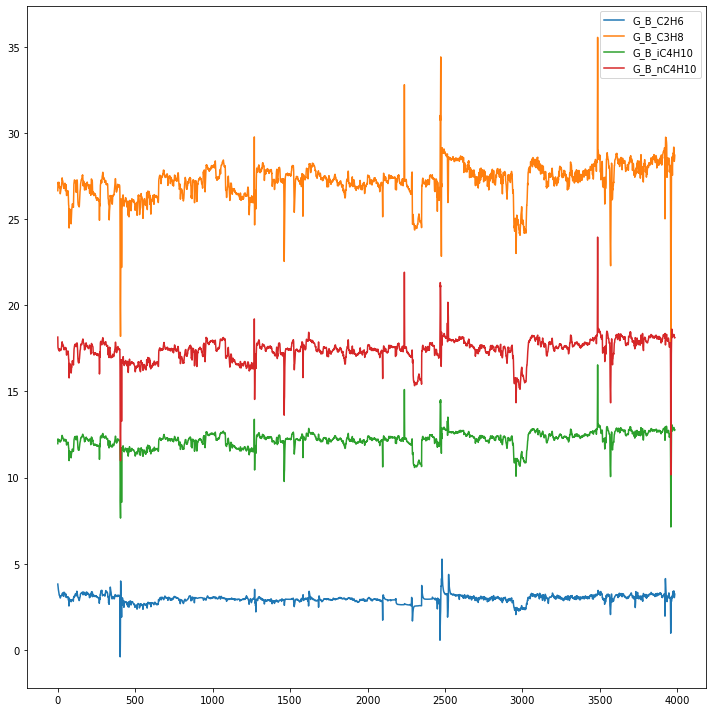

In [536]:
plt.rcParams["figure.figsize"] = (10,10)

test_data[['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [537]:
predict = pd.DataFrame()

In [538]:
predict[['timestamp']] = test_data[['timestamp']]

In [539]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [540]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [541]:
predict = pd.concat([predict,B] , axis=1)

In [542]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.136487,35.860326,16.101509,24.426845
1,2020-05-01 00:00:00,5.005460,36.534989,16.488635,23.656546
2,2020-05-01 00:30:00,4.844662,36.560018,16.489698,23.665170
3,2020-05-01 01:00:00,4.748409,36.638714,16.517512,23.681882
4,2020-05-01 01:30:00,4.718339,36.740232,16.526230,23.667524
...,...,...,...,...,...
3980,2020-07-22 21:30:00,4.327626,38.360160,17.032927,24.190793
3981,2020-07-22 22:00:00,4.021365,37.624925,16.962623,24.155403
3982,2020-07-22 22:30:00,4.075533,37.908120,16.997969,24.194732
3983,2020-07-22 23:00:00,4.203098,38.154092,17.030138,24.212723


In [543]:
predict.drop(0, axis=0, inplace=True)

In [544]:
predict = predict.reset_index(drop=True)

In [545]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,5.005460,36.534989,16.488635,23.656546
1,2020-05-01 00:30:00,4.844662,36.560018,16.489698,23.665170
2,2020-05-01 01:00:00,4.748409,36.638714,16.517512,23.681882
3,2020-05-01 01:30:00,4.718339,36.740232,16.526230,23.667524
4,2020-05-01 02:00:00,4.641492,36.753554,16.518411,23.653819
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.327626,38.360160,17.032927,24.190793
3980,2020-07-22 22:00:00,4.021365,37.624925,16.962623,24.155403
3981,2020-07-22 22:30:00,4.075533,37.908120,16.997969,24.194732
3982,2020-07-22 23:00:00,4.203098,38.154092,17.030138,24.212723


In [550]:
predict.to_csv('predictSGD.csv', sep=',', header=True, index=False)

In [551]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD.csv', header = 0, sep = ',')

In [552]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [553]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,5.005460,36.534989,16.488635,23.656546
1,2020-05-01 00:30:00,4.844662,36.560018,16.489698,23.665170
2,2020-05-01 01:00:00,4.748409,36.638714,16.517512,23.681882
3,2020-05-01 01:30:00,4.718339,36.740232,16.526230,23.667524
4,2020-05-01 02:00:00,4.641492,36.753554,16.518411,23.653819
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.327626,38.360160,17.032927,24.190793
3980,2020-07-22 22:00:00,4.021365,37.624925,16.962623,24.155403
3981,2020-07-22 22:30:00,4.075533,37.908120,16.997969,24.194732
3982,2020-07-22 23:00:00,4.203098,38.154092,17.030138,24.212723


In [983]:
test_data.to_excel('123.xlsx')